libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection

In [ ]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
gold_data.isnull().sum().sum()

np.int64(0)

Correlation: positive or negative

In [ ]:
correlation = gold_data.corr(numeric_only=True)

<Axes: >

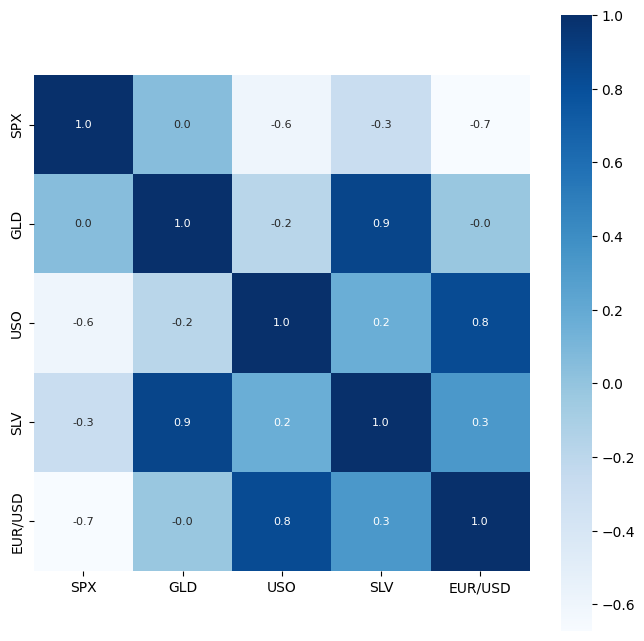

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True, square=True,fmt='.1f', annot=True, annot_kws={'size':8},cmap='Blues')

In [ ]:
#correlation values of gld
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-2574269084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

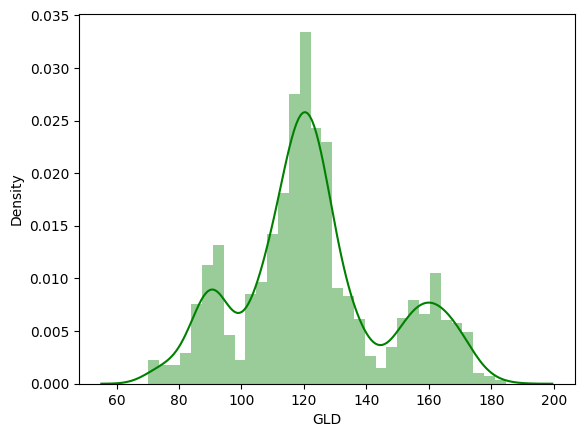

In [ ]:
# Checking the distribution of gold price
sns.distplot(gold_data['GLD'],color='green')

Splliting the features and targets

In [ ]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

Splitting traning and testing data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size= 0.2, random_state=2)

Model traning

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.3651991   81.90059991 115.96000045 127.61370076 120.78660107
 154.79319801 150.31919736 126.05930021 117.61989861 126.12240068
 116.89660095 171.67030094 141.4126983  167.82679853 115.16180024
 117.67630058 138.81610307 169.84840021 159.4481031  161.271699
 155.16030007 125.3219001  175.02049948 157.06010317 125.17630033
  93.73719979  77.57469998 120.4705002  119.0166994  167.47620053
  88.10490015 125.25930008  91.10750068 117.73369999 121.10489869
 135.84200079 115.39640141 115.38990075 147.61150063 106.99470127
 104.2595022   87.25949801 126.49450101 117.73069989 152.28909917
 119.78239994 108.37609986 108.34569815  93.32160101 127.20889774
  74.43850057 113.76739914 121.47819979 111.1972995  118.75669885
 120.98499958 159.7195994  168.39550093 146.87759656  85.97459865
  94.37030043  86.86399934  90.63980032 118.86620069 126.44910038
 127.56809999 169.30990013 122.41959914 117.34879905  98.47140034
 168.31550144 143.16759817 131.98180344 121.15360219 121.34609962
 119.7762006

In [ ]:
# R-square Error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print('R-Square error: ', error_score)

R-Square error:  0.9898057116991976


Compare actual and predicted values in plot

In [ ]:
Y_test = list(Y_test)

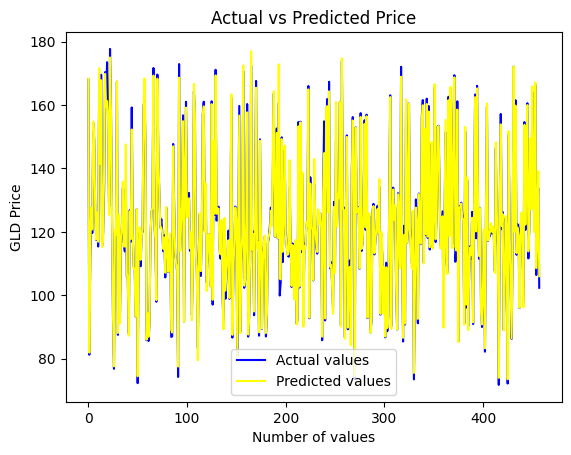

In [ ]:
plt.plot(Y_test,color='blue',label='Actual values')
plt.plot(test_data_prediction,color='Yellow',label='Predicted values')
plt.title('Actual vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

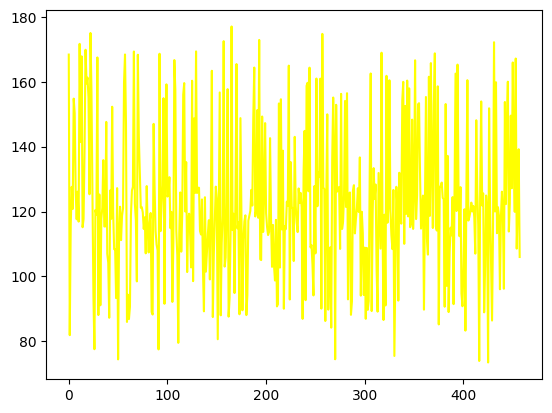